In [21]:
#libraries
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

In [6]:
train_text = pd.read_csv('D:/Kaggle/PersonalMedicine/data/training_text',sep='\|\|',header= None, skiprows=1, names=["ID","TEXT"])

D:\Users\xiao.feng\AppData\Local\conda\conda\envs\cm_root\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [8]:
test_text = pd.read_csv('D:/Kaggle/PersonalMedicine/data/test_text',sep='\|\|',header= None, skiprows=1, names=["ID","TEXT"])

D:\Users\xiao.feng\AppData\Local\conda\conda\envs\cm_root\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [9]:
train_var = pd.read_csv('D:/Kaggle/PersonalMedicine/data/training_variants',sep=',')

In [10]:
test_var = pd.read_csv('D:/Kaggle/PersonalMedicine/data/test_variants',sep=',')

## Merge variants and test variables

In [11]:
train = pd.merge(train_var, train_text, how='left', on='ID')

In [13]:

del train_var, train_text
train.head()

In [14]:
test= pd.merge(test_var, test_text, how= 'left', on ='ID')
del test_var, test_text
test.head()

,ID,Gene,Variation,TEXT
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


In [16]:
train.describe(include ='all')

,ID,Gene,Variation,Class,TEXT
count,3321.000000,3321,3321,3321.000000,3321
unique,NaN,264,2996,NaN,1921
top,NaN,BRCA1,Truncating Mutations,NaN,The PTEN (phosphatase and tensin homolog) phos...
freq,NaN,264,93,NaN,53
mean,1660.000000,NaN,NaN,4.365854,NaN
std,958.834449,NaN,NaN,2.309781,NaN
min,0.000000,NaN,NaN,1.000000,NaN
25%,830.000000,NaN,NaN,2.000000,NaN
50%,1660.000000,NaN,NaN,4.000000,NaN
75%,2490.000000,NaN,NaN,7.000000,NaN


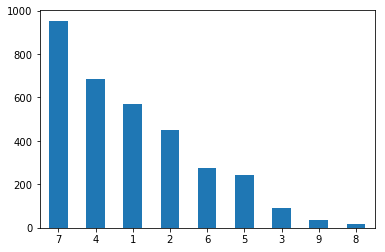

In [20]:
# class checking
train.Class.value_counts().plot(kind='bar',rot=0)

### build a helper to evaluate effecitivness of tranformed features

In [ ]:
def evaluate_feature(X, y, clf)
    if clf== None
        clf= LogisticRegression()
    prob = cross_val_predict(clf,X, y, cv= StratifiedKfold(ramdom_state=8),n_jobs=-1,method='predict_proba'
                            verbose=2)